$\textbf{HW 5}$

The purpose of this homework is to work carefully through a numeric/simulted solution to Bayes' Theorem. Bayes' Theorem reads:
\begin{equation} P(signal|data) = \frac{P(data|signal)P(signal)}{P(data)} \end{equation}

Effectively the goal of this hoemwork (and the lab) is to find $P(signal|data)$

Reading through Bayes' theorem it says that given a data reading, the probability it was produced by a given true signal  $(P(signal|data))$ , is equal to the probability of getting a particular data reading given a certain true signal  $(P(data|signal))$  times the probability of the signal having a particular strength  $(P(signal))$ , divided by the probability of each data reading  $(P(data))$.

This is just math, so is true. But in practice it is quite subtle how to use this. A few pointers:

This is just math, so is true. But in practice it is quite subtle how to use this. A few pointers:

- $P(signal|data)$  is what we want to know. What was the probability distribution of the true signal given the measurement we have? Unfortunately it is hard to calculate from first principles.

- $P(data|signal)$  Is usually easy to determine. If we have a signal-free background (see first 4 weeks of this class), we can inject fake signals of known strength and then simulate the observations in the presence of known (fake) signals. This means we can easily generate  $P(data|signal)$ .

- $P(signal)$  is called a prior. It is the probability the signal has a particular strength. Priors can be used to great effect, such as in combining the results of multiple particle physics experiments. But it is also the source of 90\% of all statistical mistakes. It is incredibly dangerous. Almost all of the time—and always in this class—we will want a weak/uniform prior. One of the most dangerous bits of using Bayes' Theorem is that it is easy to have an implicit prior which will give you the wrong answer and you don't know why.

- $P(data)$  in the denominator is almost always just a normalization factor, and is often dropped. This means the result will have to be renormalized, usually by making sure the full  $P(signal|data)$  integrates to one.

So the homework is to numerically work through this equation.

$\textbf{Problem 1}$

First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest $\sigma$ , say in the range 2-5. Create a million background events.

Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. Now it is critically important that you throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20). Mathematically this is the $P(signal)$ in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad).

Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have  $P(data|signal)P(signal)$.

Now make one of the 2D histograms as shown in class. Here we want to histogram the signal vs. the simulated data readings. There are a couple of ways to do this, but it will be easier later if you define your bin edges explicitly, make a histogram, then plot it. Here is the code I used for the plot in class:


In [269]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

Text(0.5, 0, 'Observed data, $P(d|s)$')

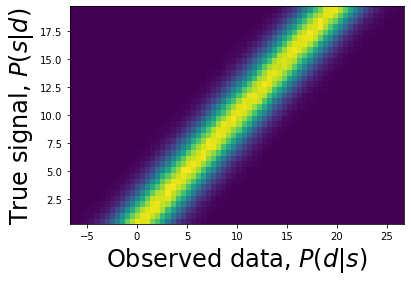

In [270]:
bkgd = stats.norm.rvs(loc=0,scale=2,size=1000000)
signal = stats.uniform.rvs(loc=0,scale=20,size=1000000)
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2 = np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Now to explore this we can take slices of the above. We can look at our array edges and pick a vertical or horizontal stripe.

$\textbf{Problem 1b}$

Select a true injected signal and plot  $P(d|s)$. (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. [Hint: this was also shown in class.]

Our signal range is 0-20 (shown below) so i'll just select 13.07692308 arbitrarily for my true signal value.

In [271]:
signalcenters

array([ 0.25641026,  0.76923077,  1.28205128,  1.79487179,  2.30769231,
        2.82051282,  3.33333333,  3.84615385,  4.35897436,  4.87179487,
        5.38461538,  5.8974359 ,  6.41025641,  6.92307692,  7.43589744,
        7.94871795,  8.46153846,  8.97435897,  9.48717949, 10.        ,
       10.51282051, 11.02564103, 11.53846154, 12.05128205, 12.56410256,
       13.07692308, 13.58974359, 14.1025641 , 14.61538462, 15.12820513,
       15.64102564, 16.15384615, 16.66666667, 17.17948718, 17.69230769,
       18.20512821, 18.71794872, 19.23076923, 19.74358974])

In [272]:
signalcenters[25]

13.076923076923077

Text(0, 0.5, 'Probability')

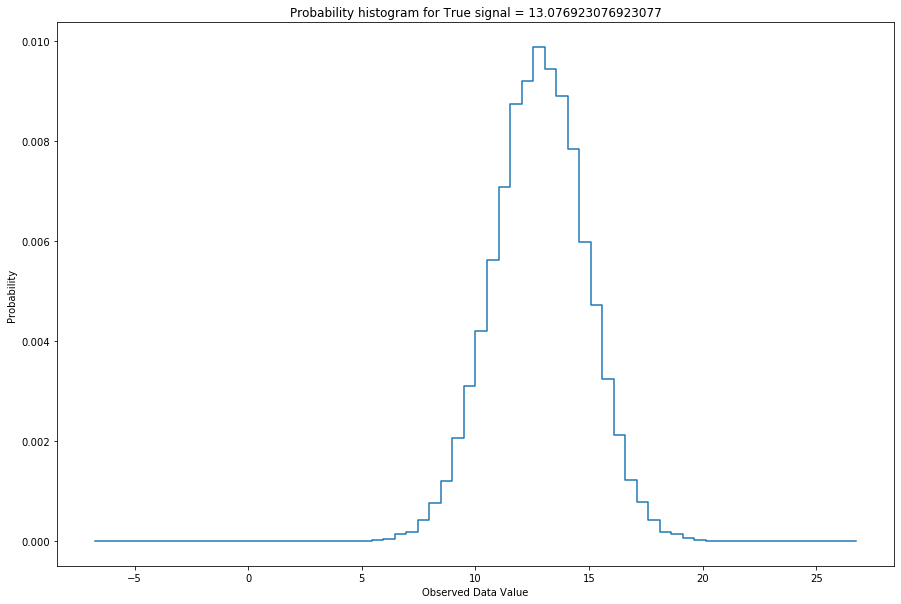

In [273]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
ax.step(datacenters, Psd.transpose()[25]);
ax.set_title('Probability histogram for True signal = ' + str(signalcenters[25]))
ax.set_xlabel('Observed Data Value')
ax.set_ylabel('Probability')

For clarity, I'll add the pictures similar to the ones we saw in lecture to represent where this data comes from in an alternative visual form. (The horizontal line is shown below).

Text(0.5, 0, 'Observed data, $P(d|s)$')

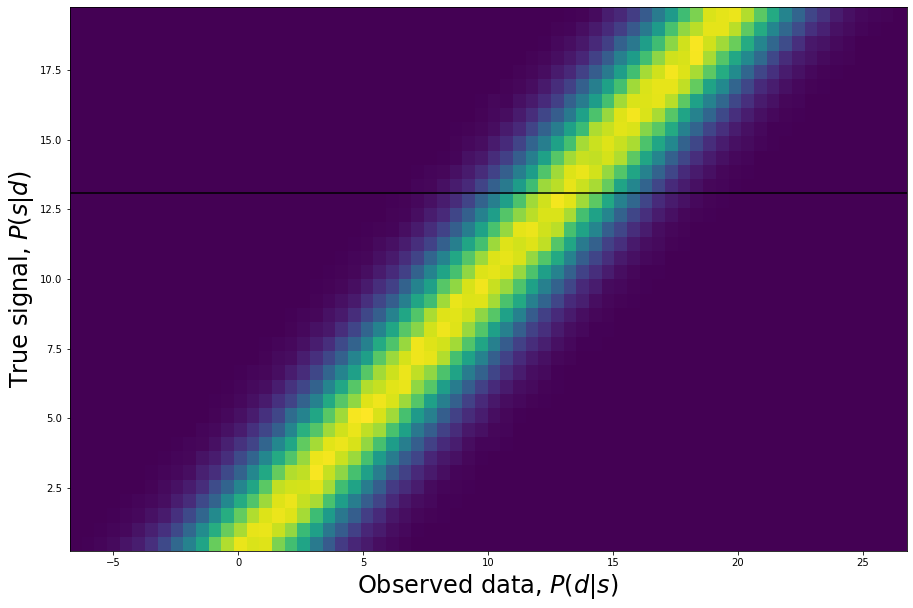

In [274]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
plt.pcolormesh(datacenters,signalcenters,Psd.T)
ax.hlines(signalcenters[25], datacenters.min(), datacenters.max());
ax.set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax.set_xlabel('Observed data, $P(d|s)$', fontsize = 24)

Utlimately, this histogram represents the probability of measuring an observed data value given some true signal value. Since it essentially is a "slice" of the overall data, it corresponds to measured values with true signal values within the range defined by our chosen number. I chose ~13, which corresponds to signalcenters[25], i.e our range is the bin between the bounds of adjacent indices.

$\textbf{Problem 1c}$

Select an observed data value and plot  $P(s|d)$. (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

Once again, I'll arbitrarily select a number, 19.64179104.

In [275]:
datacenters

array([-6.74626866, -6.23880597, -5.73134328, -5.2238806 , -4.71641791,
       -4.20895522, -3.70149254, -3.19402985, -2.68656716, -2.17910448,
       -1.67164179, -1.1641791 , -0.65671642, -0.14925373,  0.35820896,
        0.86567164,  1.37313433,  1.88059701,  2.3880597 ,  2.89552239,
        3.40298507,  3.91044776,  4.41791045,  4.92537313,  5.43283582,
        5.94029851,  6.44776119,  6.95522388,  7.46268657,  7.97014925,
        8.47761194,  8.98507463,  9.49253731, 10.        , 10.50746269,
       11.01492537, 11.52238806, 12.02985075, 12.53731343, 13.04477612,
       13.55223881, 14.05970149, 14.56716418, 15.07462687, 15.58208955,
       16.08955224, 16.59701493, 17.10447761, 17.6119403 , 18.11940299,
       18.62686567, 19.13432836, 19.64179104, 20.14925373, 20.65671642,
       21.1641791 , 21.67164179, 22.17910448, 22.68656716, 23.19402985,
       23.70149254, 24.20895522, 24.71641791, 25.2238806 , 25.73134328,
       26.23880597, 26.74626866])

In [276]:
datacenters[52]

19.64179104477612

Text(0, 0.5, 'Probability')

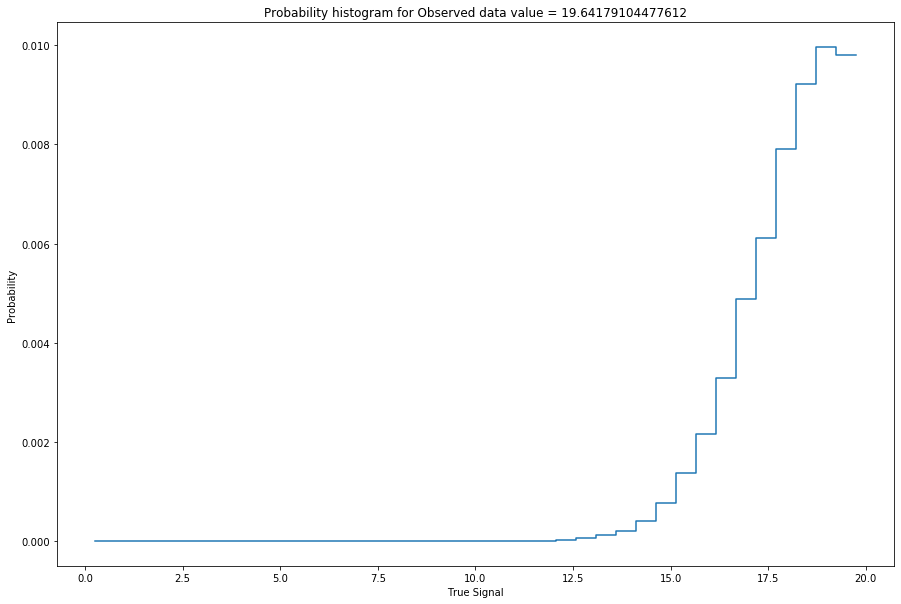

In [277]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
ax.step(signalcenters, Psd[52]);
ax.set_title('Probability histogram for Observed data value = ' + str(datacenters[52]))
ax.set_xlabel('True Signal')
ax.set_ylabel('Probability')

Once again, I'll show a line like we see in lecture.

Text(0.5, 0, 'Observed data, $P(d|s)$')

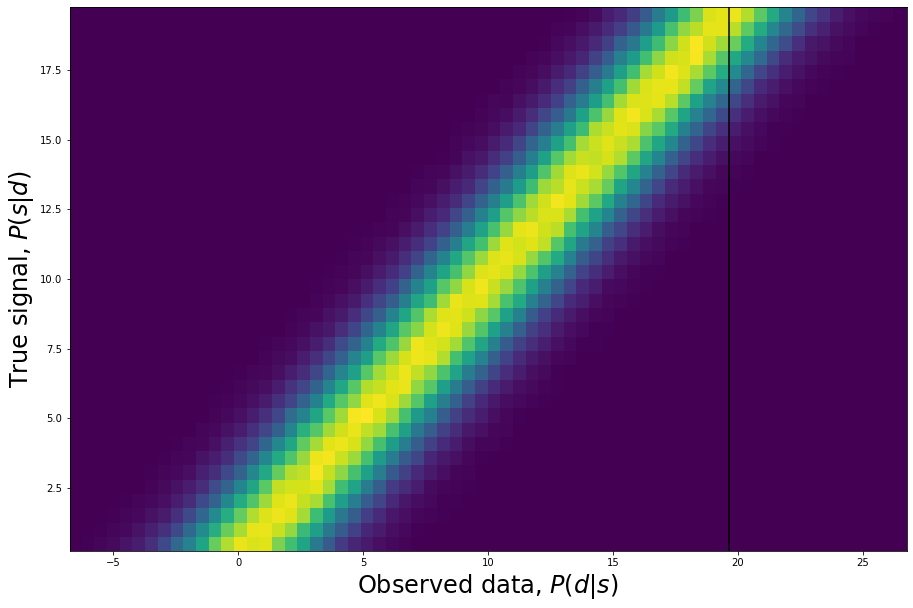

In [278]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
plt.pcolormesh(datacenters,signalcenters,Psd.T)
ax.vlines(datacenters[52], signalcenters.min(), signalcenters.max());
ax.set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax.set_xlabel('Observed data, $P(d|s)$', fontsize = 24)

Utlimately, this histogram represents the probability of measuring a true siganl  given some observed data value. Since it essentially is a "slice" of the overall data, it corresponds to measured values with observed data values within the range defined by our chosen number. I chose ~19.6, which corresponds to datacenters[52], i.e our range is the bin between the bounds of adjecent indices. In this case, it cuts off at true signal = 20, because our signal does not have values higher than 20 when it was declared by the problem specifications. (Also, sorry, I chose a value that is really close to the edge! My bad, makes it a little less obvious).

$\textbf{Problem 2}$

Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  σ ]. Reproduce the graphs above. Lastly overplot the  $P(d|s)$  and  $P(s|d)$  plots. Why are they not centered on the same value? Explain carefully.

I elected not to copy-paste the explanations, as they are fairly redundant here. 

Text(0.5, 0, 'Observed data, $P(d|s)$')

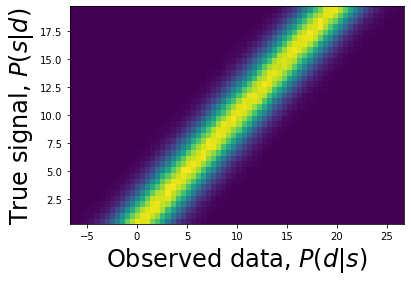

In [279]:
bkgd2 = stats.norm.rvs(loc=8.7,scale=2,size=1000000)
signal2 = stats.uniform.rvs(loc=0,scale=20,size=1000000)
data2 = bkgd2 + signal2

signaledges2 = np.linspace(0,20,40)
dataedges2 = np.linspace(-7,27,68)

Psd2, temp, temp2 = np.histogram2d(data2,signal2, bins=[dataedges,signaledges], density=True)

datacenters2 = (dataedges2[:-1] + dataedges2[1:]) / 2
signalcenters2 = (signaledges2[:-1] + signaledges2[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Since ultimately our choice of true signal / observed data value are arbitrary, I've selected to not modify the array indicies here. So, it will be exactly the same code as before :P

Text(0, 0.5, 'Probability')

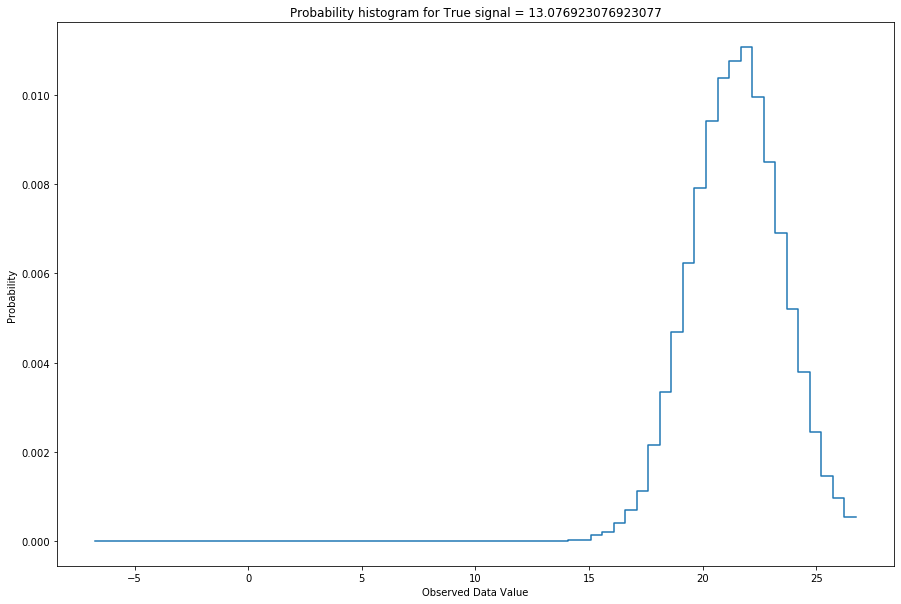

In [280]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
ax.step(datacenters2, Psd2.transpose()[25]);
ax.set_title('Probability histogram for True signal = ' + str(signalcenters2[25]))
ax.set_xlabel('Observed Data Value')
ax.set_ylabel('Probability')

Text(0.5, 0, 'Observed data, $P(d|s)$')

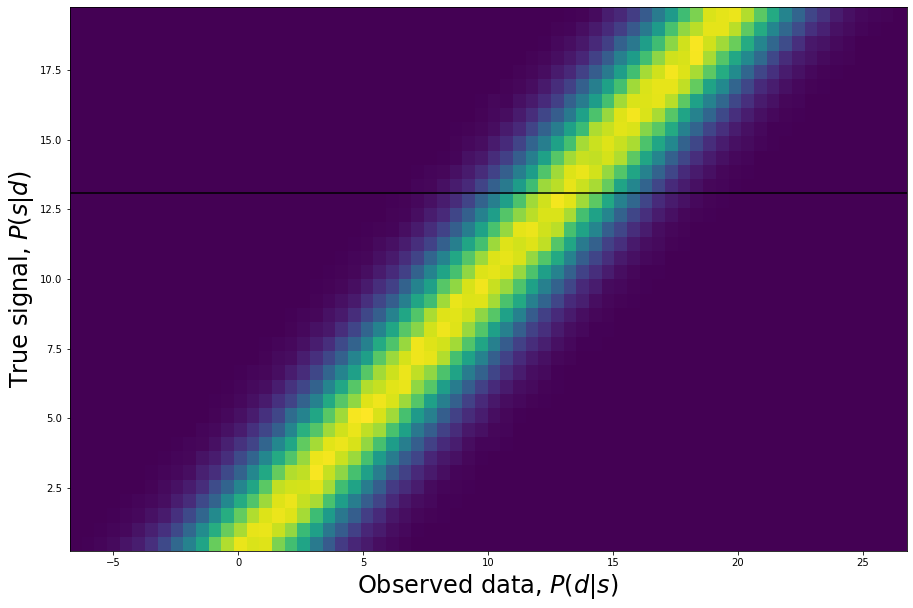

In [281]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
plt.pcolormesh(datacenters2,signalcenters2,Psd.T)
ax.hlines(signalcenters2[25], datacenters2.min(), datacenters2.max());
ax.set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax.set_xlabel('Observed data, $P(d|s)$', fontsize = 24)

Text(0, 0.5, 'Probability')

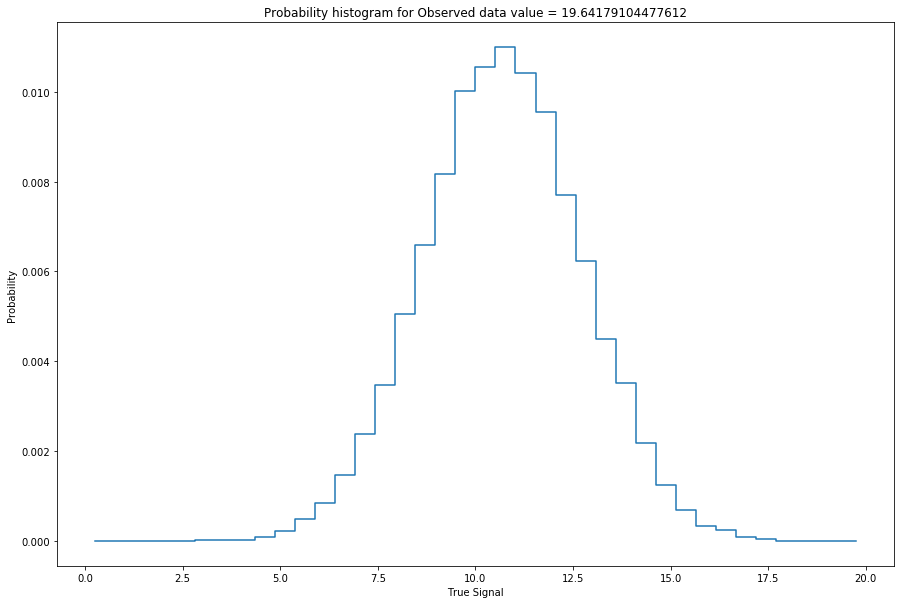

In [286]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
ax.step(signalcenters2, Psd2[52]);
ax.set_title('Probability histogram for Observed data value = ' + str(datacenters2[52]))
ax.set_xlabel('True Signal')
ax.set_ylabel('Probability')

Text(0.5, 0, 'Observed data, $P(d|s)$')

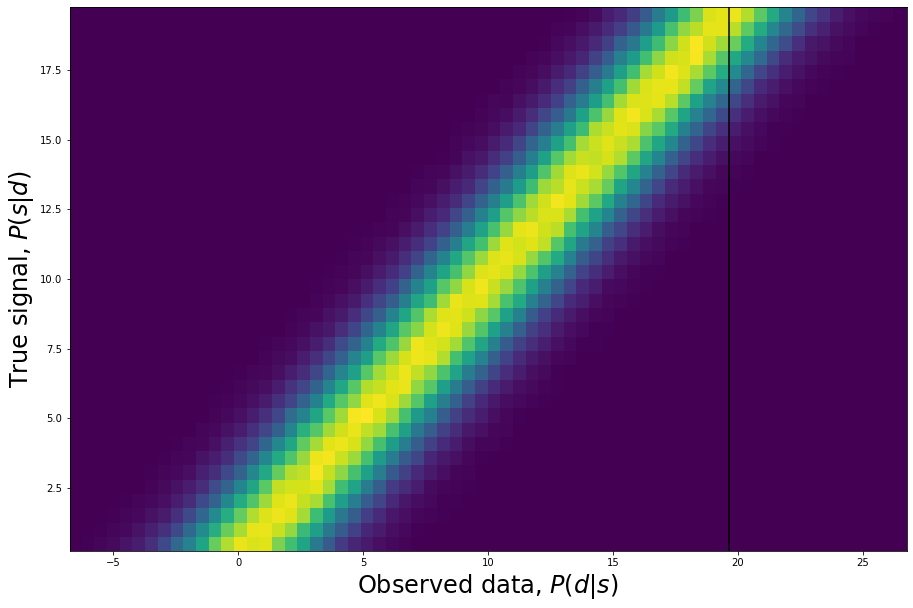

In [283]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
plt.pcolormesh(datacenters2,signalcenters2,Psd.T)
ax.vlines(datacenters2[52], signalcenters2.min(), signalcenters2.max());
ax.set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax.set_xlabel('Observed data, $P(d|s)$', fontsize = 24)

Text(0.5, 1.0, 'Overlapped True signal histograms of Zero mean (blue) and non-zero mean (orange) bkgds')

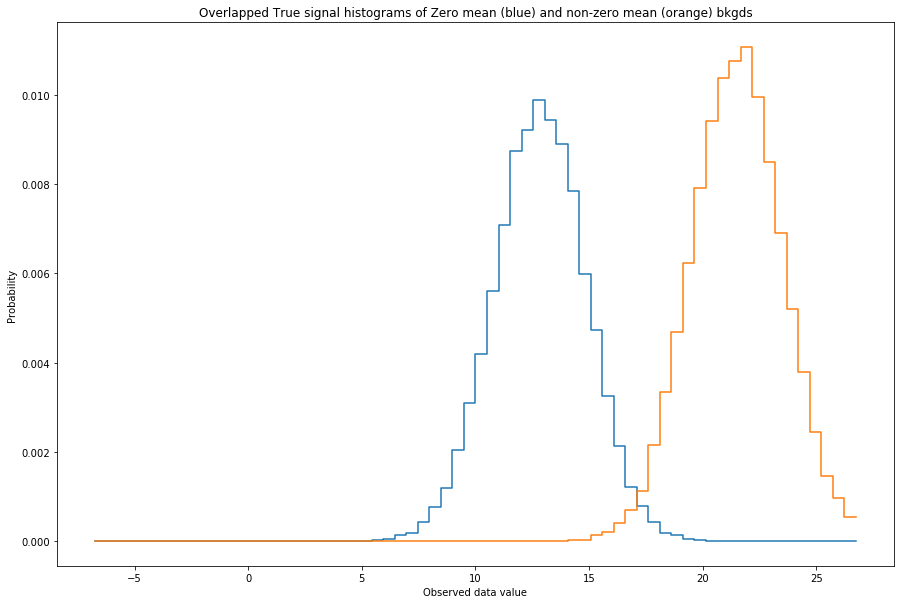

In [284]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
ax.step(datacenters, Psd.transpose()[25]);
ax.step(datacenters2, Psd2.transpose()[25]);
ax.set_xlabel('Observed data value')
ax.set_ylabel('Probability')
ax.set_title('Overlapped True signal histograms of Zero mean (blue) and non-zero mean (orange) bkgds')

Text(0.5, 1.0, 'Overlapped observed data value histograms for Zero mean (blue) and non-zero mean (orange) bkgds')

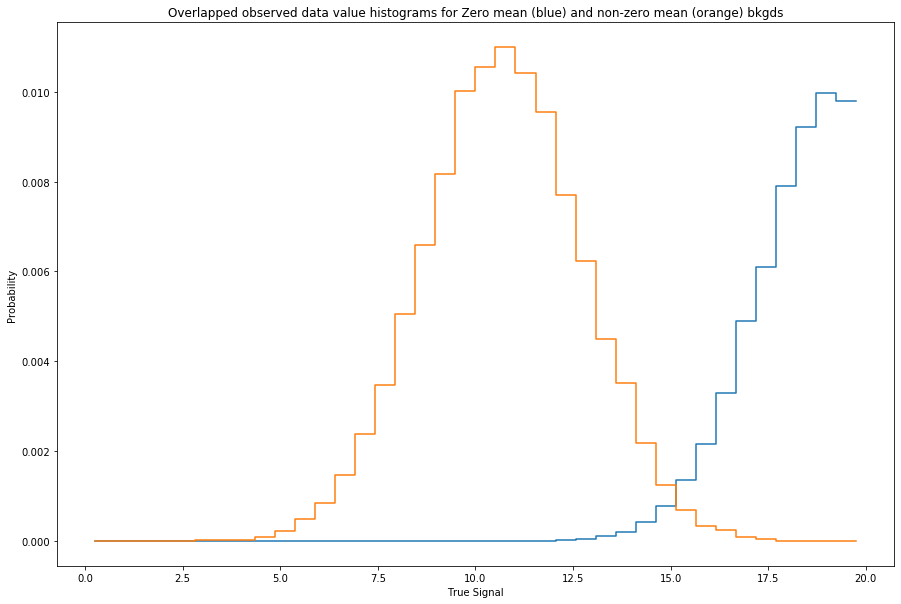

In [287]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
ax.step(signalcenters, Psd[52]);
ax.step(signalcenters2, Psd2[52]);
ax.set_xlabel('True Signal')
ax.set_ylabel('Probability')
ax.set_title('Overlapped observed data value histograms for Zero mean (blue) and non-zero mean (orange) bkgds')

Now, we expect a slight shift here, because we are not using a non-zero background and data = signal + bkgd. We know the observed data value has been shifted, since the bkgd has non-zero mean, so as a consequence of the above equation (signal = data - bkgd) it makes sense to expect the true signal distribution to be shifted to less than the observed signal, whereas the observed signal is shifted to be more than the true signal (i.e how orange/blue swap places for the two different overlaps). To summarize, the shifting is an expected consequence of simply increasing the mean of our background distribution, due to our equation data = signal + bkgd. When background increases, the corresponding true signal disshould shift to the left relative to an overplot whos background is constant.

Note: There were a lot of graphs here with a lot of copy-pasting graphs back and forth, so apologies for any typos!